In [3]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

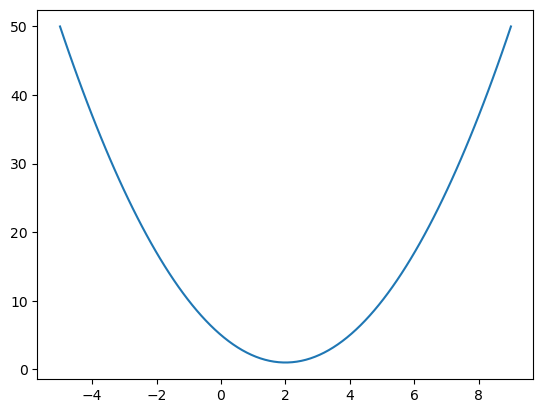

In [20]:
def f(x):
    return (x-2)**2 + 1
    
xs = np.linspace(-5, 9, 100)
ys = [f(x) for x in xs]

plt.plot(xs, ys)

2) If we start at $x=4$, which way should we move and why?

In [ ]:
#Left

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

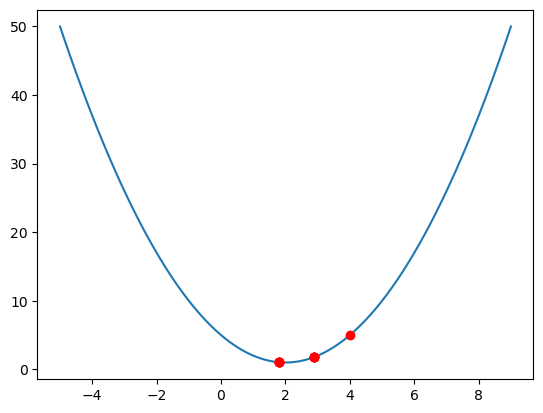

In [45]:
def f_p(x):
    return 2*(x-2) 

def get_x_star(x, slope, a):
    return x - ((slope / abs(slope)) * a)

xs_sol = list()
ys_sol = list()

x_0 = 4
x_star = x_0
max_iterations = 10
a = 1.1

xs_sol.append(x_star)
ys_sol.append(f(x_star))

for i in range(max_iterations):
    x_star = get_x_star(x_star, f_p(x_star), a)
    xs_sol.append(x_star)
    ys_sol.append(f(x_star))
    
plt.plot(xs,ys)
plt.plot(xs_sol, ys_sol, 'ro')

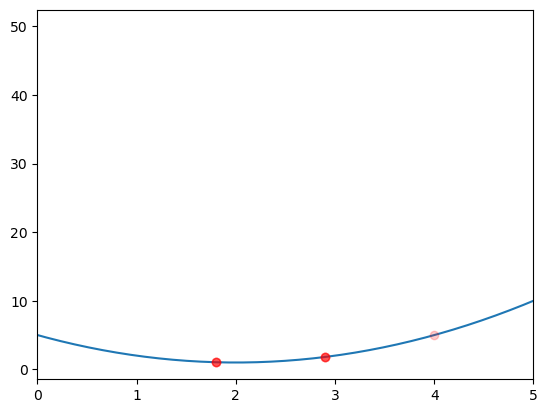

In [46]:
plt.xlim(0, 5)
plt.plot(xs,ys)
plt.plot(xs_sol, ys_sol, 'ro', alpha=0.2)

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

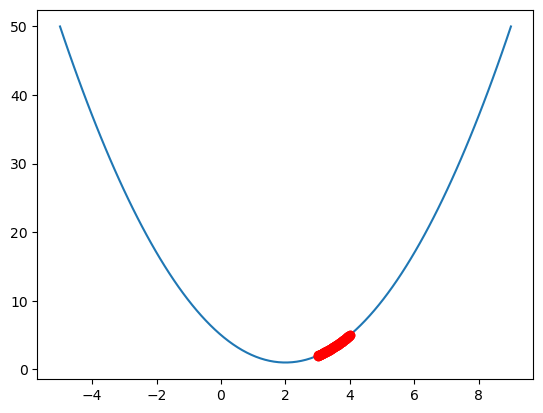

In [47]:
def f_p(x):
    return 2*(x-2) 

def get_x_star(x, slope, a):
    return x - ((slope / abs(slope)) * a)

xs_sol = list()
ys_sol = list()

x_0 = 4
x_star = x_0
max_iterations = 100
a = 0.01

xs_sol.append(x_star)
ys_sol.append(f(x_star))

for i in range(max_iterations):
    x_star = get_x_star(x_star, f_p(x_star), a)
    xs_sol.append(x_star)
    ys_sol.append(f(x_star))
    
plt.plot(xs,ys)
plt.plot(xs_sol, ys_sol, 'ro')


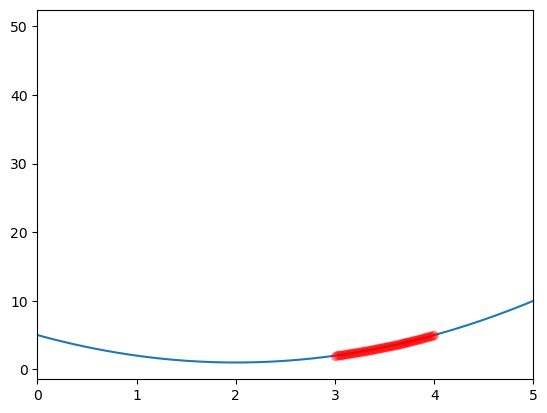

In [48]:
plt.xlim(0, 5)
plt.plot(xs,ys)
plt.plot(xs_sol, ys_sol, 'ro', alpha=0.2)

6) When do we want the step size to be small and when do you want the step size to be big?

$$
|slope| * c = step size
$$

In [ ]:
# We use dynamic step size |slope| * learning rate = step size

7) What function kind of does that?

In [ ]:
# gradients * learning rate

8)If we use that function, what does the update rule looks like.

In [ ]:
# gradient * learning rate

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

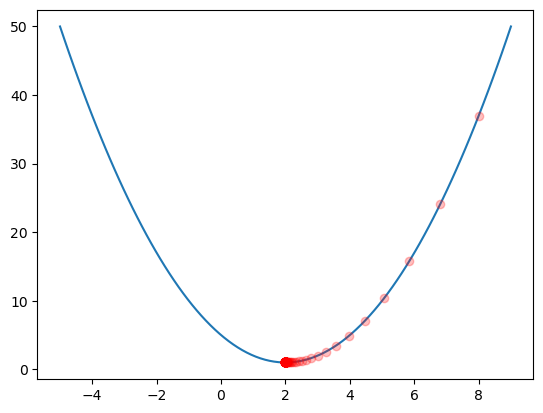

In [79]:
def f_p(x):
    return 2*(x-2) 

def get_x_star(x, slope, a):
    return x - (slope) * a


x_0 = 8
x_star = x_0
max_iterations = 100
a = 0.1

xs_sol = [x_star]
ys_sol = [f(x_star)]

for i in range(max_iterations):
    x_star = get_x_star(x_star, f_p(x_star), a)
    xs_sol.append(x_star)
    ys_sol.append(f(x_star))
    
plt.plot(xs,ys)
plt.plot(xs_sol, ys_sol, 'ro', alpha=0.25)


10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

solution: 2.0000000012222214


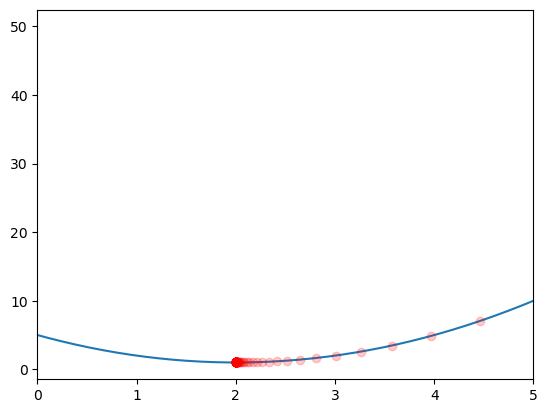

In [80]:
plt.xlim(0, 5)
plt.plot(xs,ys)
plt.plot(xs_sol, ys_sol, 'ro', alpha=0.2)
print(f'solution: {xs_sol[-1]}')

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + y^2 + 1$$
Make the 3D plot.

In [233]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface

print(2*(15 - 2 ) + 15**2)

def objfunc(sol):
    return (sol[0] - 2 )**2 + sol[0] * sol[1] + sol[1]**2 + 1

def slopefunc(sol, h=0.1):
    slope = np.zeros(sol.shape[0])
    for i in range(sol.shape[0]):
        # c = np.zeros(sol.shape)[i] = h
        c = [0]*sol.shape[0]
        c[i] = h
        c = np.array(c)
        slope[i] = (objfunc(sol - c) + objfunc(sol + c) ) / 2 * h 
    
    print(f'slope at {sol} = {slope}')
    return slope

def get_next_sol(sol, slopefunc, a = 0.1):
    slope = slopefunc(sol)
    return sol - slope * a

# Run Search

s_0 = np.array([15, 15])
s_star = s_0
max_iterations = 100

solutions = np.array([s_0])
objectives = np.array([objfunc(s_0)])

for i in range(max_iterations):
    s_star = get_next_sol(s_star, slopefunc)
    
    print(s_star)
    solutions = np.concatenate((solutions, [s_star]))
    objectives = np.concatenate((objectives, [objfunc(s_star)]))
    
    

251
slope at [15 15] = [62.001 62.001]
[8.7999 8.7999]
slope at [8.7999 8.7999] = [20.212512 20.212512]
[6.7786488 6.7786488]
slope at [6.7786488 6.7786488] = [11.57456435 11.57456435]
[5.62119237 5.62119237]
slope at [5.62119237 5.62119237] = [7.73186414 7.73186414]
[4.84800595 4.84800595]
slope at [4.84800595 4.84800595] = [5.61274613 5.61274613]
[4.28673134 4.28673134]
slope at [4.28673134 4.28673134] = [4.29912714 4.29912714]
[3.85681862 3.85681862]
slope at [3.85681862 3.85681862] = [3.42078752 3.42078752]
[3.51473987 3.51473987]
slope at [3.51473987 3.51473987] = [2.80112296 2.80112296]
[3.23462758 3.23462758]
slope at [3.23462758 3.23462758] = [2.34599364 2.34599364]
[3.00002821 3.00002821]
slope at [3.00002821 3.00002821] = [2.0010395 2.0010395]
[2.79992426 2.79992426]
slope at [2.79992426 2.79992426] = [1.73290306 1.73290306]
[2.62663396 2.62663396]
slope at [2.62663396 2.62663396] = [1.5201082 1.5201082]
[2.47462314 2.47462314]
slope at [2.47462314 2.47462314] = [1.34827865 1

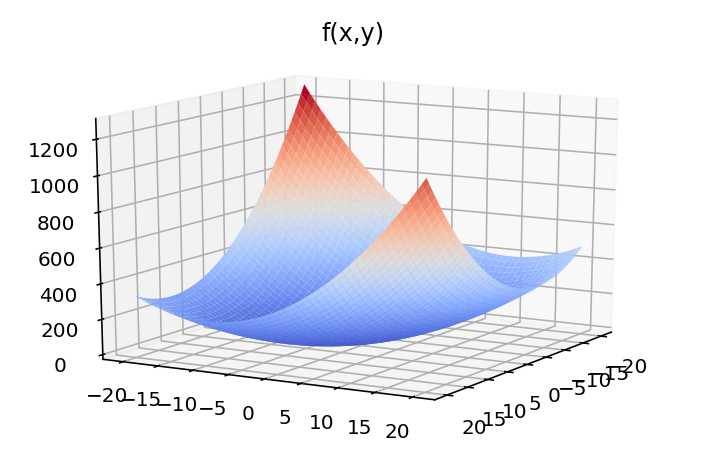

In [3]:
    
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour.

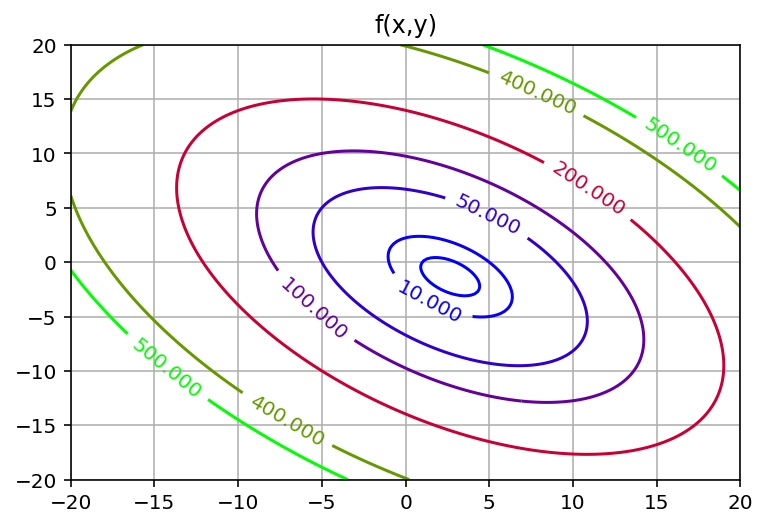

In [4]:
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

3)Where do you think the minimum is?

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

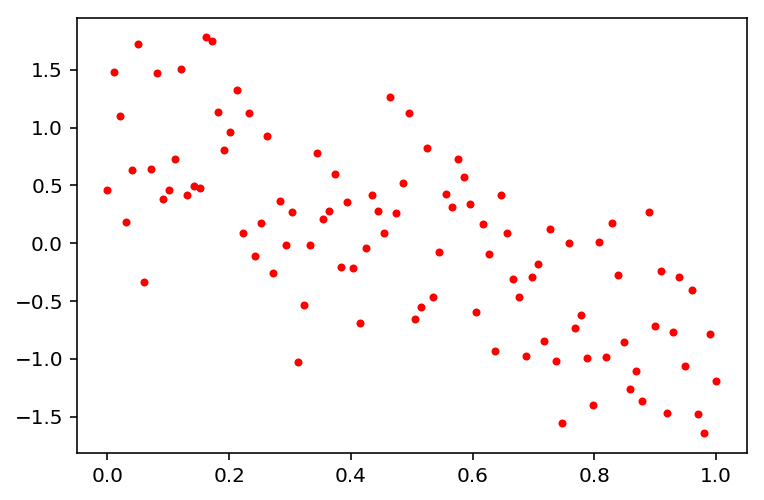

In [5]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

1) What exactly are we trying to minimize and why?

2) Minimize and Visualize it.

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [235]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

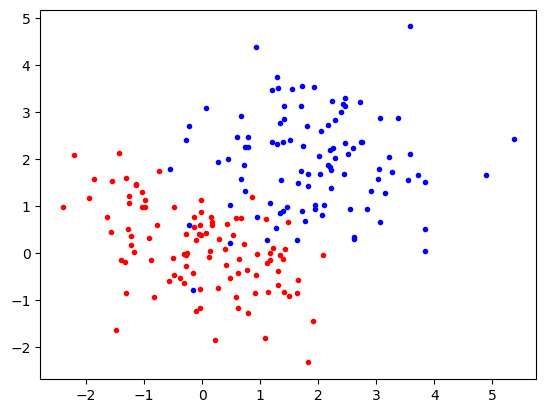

In [241]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?

In [237]:
d

array([[-1.23086966e+00,  1.87319024e-01],
       [ 1.56900223e-01,  7.64678066e-01],
       [-1.48876741e+00, -1.64011723e+00],
       [ 1.30714602e+00, -3.72480234e-01],
       [ 6.74618388e-01,  7.50597114e-01],
       [ 9.45842687e-01, -1.90182398e-02],
       [ 1.65971858e+00, -5.63461720e-01],
       [ 1.91304992e+00, -1.43409072e+00],
       [-1.25215912e+00,  1.07673845e+00],
       [-3.72603272e-01, -5.15851453e-01],
       [ 7.14659007e-01,  1.93716162e-01],
       [-1.02708336e-01, -1.22090529e+00],
       [-1.30358744e+00,  1.60276889e+00],
       [ 4.27235358e-01,  6.16845555e-01],
       [-2.55860503e-01,  3.38542247e-03],
       [-4.80668572e-01,  9.86442249e-01],
       [-2.69118098e-01,  4.10963031e-01],
       [ 1.30995360e+00, -6.70156969e-01],
       [ 2.80058853e-01, -7.44209215e-01],
       [ 1.34634767e+00, -3.55848535e-02],
       [-1.04263611e+00,  9.92166585e-01],
       [-9.20813174e-01,  3.24447804e-01],
       [ 1.65228093e-01,  6.09060844e-01],
       [ 7.

In [239]:
c

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [247]:

def objfunc(pos, m, c):
    blue_dist = 0
    red_dist = 0
    for i,(pos) in enumerate(d):
        if c[i] == 0:
            blue_dist +=  distance_from_line(pos, m, c)
        else:
            red_dist +=  distance_from_line(pos, m, c)
    return blue_dist - red_dist
    
def distance_from_line(pos, m, c):
    return math.abs( y - (m*pos[0]) + c )

def gradient_descent(pos, m):
    

def get_next_sol(sol, slopefunc, a = 0.1):
    slope = slopefunc(sol)
    return sol - slope * a


# Run Search
m = np.array([15, 15])
c = np.array([15, 15])

s_star = s_0
max_iterations = 100

solutions = np.array([s_0])
objectives = np.array([objfunc(s_0)])

for i in range(max_iterations):
    s_star = get_next_sol(s_star, slopefunc)
    
    print(s_star)
    solutions = np.concatenate((solutions, [s_star]))
    objectives = np.concatenate((objectives, [objfunc(s_star)]))
    

TypeError: objfunc() missing 2 required positional arguments: 'm' and 'c'